In [85]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

# Load FITS data
fits_oiii = fits.open(r"C:\Users\DEEPMALYA\OneDrive\Desktop\pip_Malya\Astronomy\Pillars Of Creation\502nmos.fits")[0].data
fits_ha   = fits.open(r"C:\Users\DEEPMALYA\OneDrive\Desktop\pip_Malya\Astronomy\Pillars Of Creation\656nmos.fits")[0].data
fits_sii  = fits.open(r"C:\Users\DEEPMALYA\OneDrive\Desktop\pip_Malya\Astronomy\Pillars Of Creation\673nmos.fits")[0].data


In [86]:
fits_oiii

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(1600, 1600), dtype='>f4')

In [87]:
fits_ha

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(1600, 1600), dtype='>f4')

In [88]:
fits_sii

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(1600, 1600), dtype='>f4')

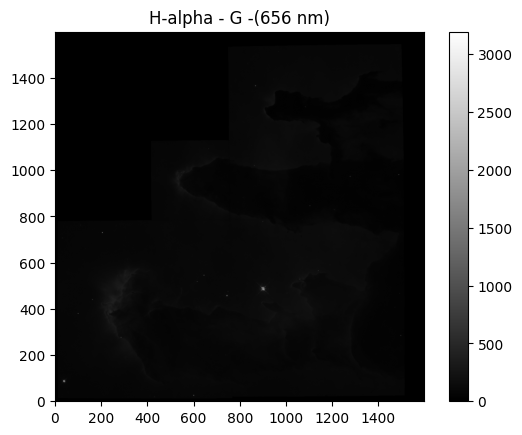

In [89]:

# Plot one channel
plt.imshow(fits_ha, cmap='gray', origin='lower')
plt.colorbar()
plt.title("H-alpha - G -(656 nm)")
plt.show()


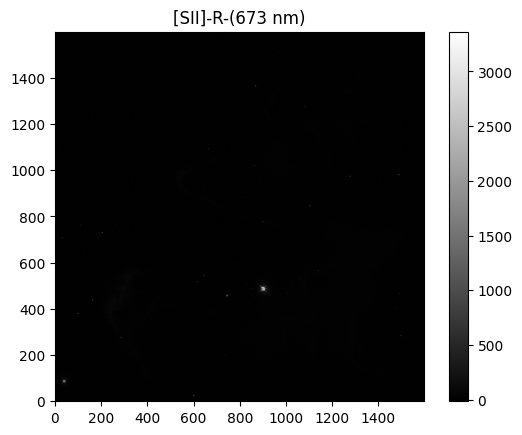

In [90]:

# Plot one channel
plt.imshow(fits_sii, cmap='gray', origin='lower')
plt.colorbar()
plt.title("[SII]-R-(673 nm)")
plt.show()


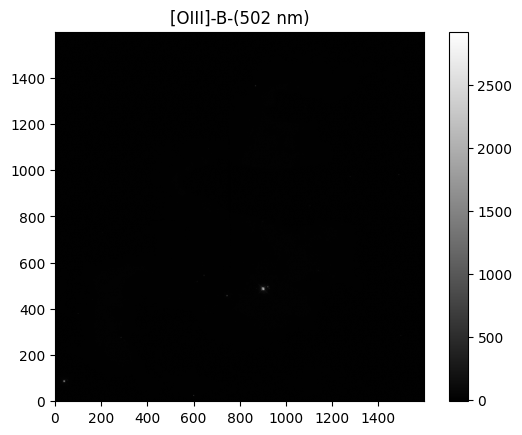

In [91]:
# Plot one channel
plt.imshow(fits_oiii, cmap='gray', origin='lower')
plt.colorbar()
plt.title("[OIII]-B-(502 nm)")
plt.show()


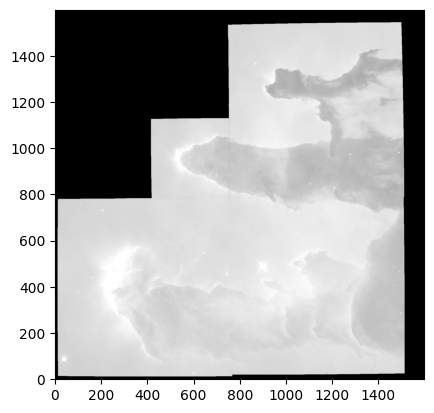

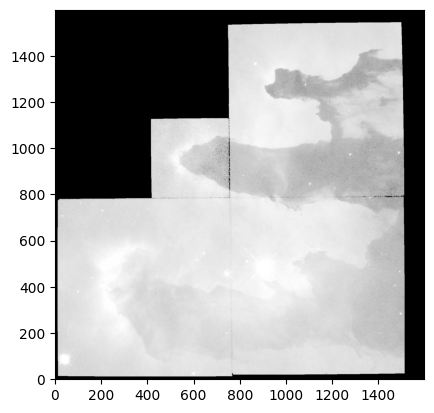

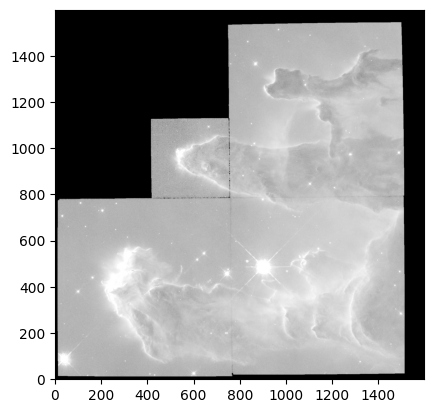

In [92]:
from astropy.visualization import ImageNormalize, PercentileInterval, LogStretch

data=[fits_ha,fits_oiii,fits_sii]
for child in data:
    norm=ImageNormalize(child, interval=PercentileInterval(99),stretch=LogStretch())
    plt.imshow(child,cmap='gray', origin='lower', norm=norm)
    plt.show()

## Minmax scaling
...................................................

.   x' = (x - min(x)) / (max(x) - min(x))         .

...................................................

In [93]:
# Normalizing each channel

norm_oiii=(fits_oiii-np.min(fits_oiii))/(np.max(fits_oiii)-np.min(fits_oiii))
norm_ha=(fits_ha-np.min(fits_ha))/(np.max(fits_ha)-np.min(fits_oiii))
norm_sii=(fits_sii-np.min(fits_sii))/(np.max(fits_sii)-np.min(fits_sii))


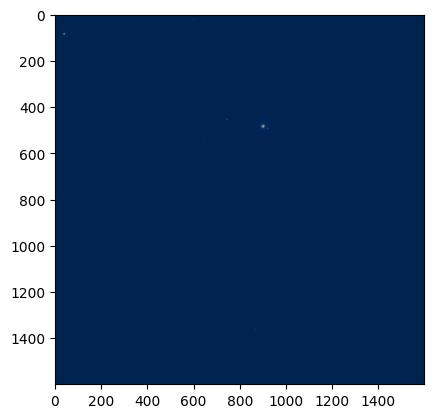

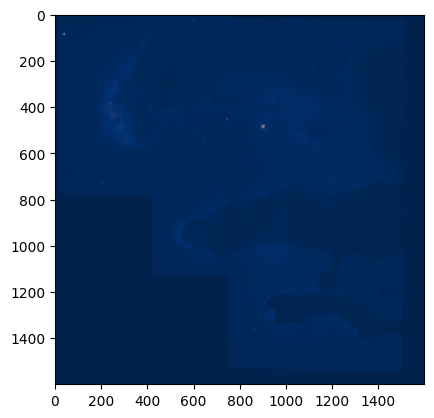

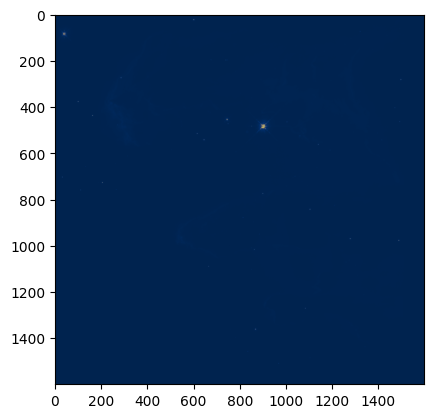

In [94]:
data_updated=[norm_oiii,norm_ha,fits_sii]

for child in data_updated:
    plt.imshow(child, cmap='cividis')
    plt.show()

In [95]:
# Mapping to RBG palletes -SHO for the ESA Hubble Space Telescope

rgb=np.dstack([norm_sii,norm_ha,norm_oiii]) # - In RGB format

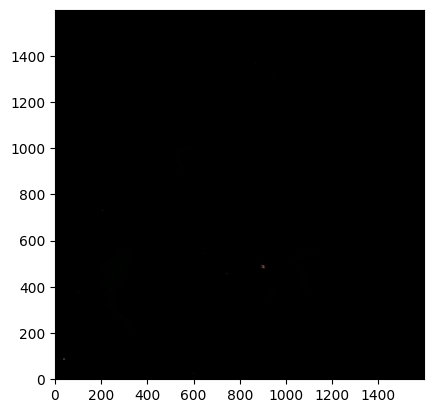

In [96]:
from skimage.color import rgb2gray
from skimage.exposure import rescale_intensity

luminance=rescale_intensity(norm_ha, in_range='image',out_range=(0,1))
rgb_lum = rgb * luminance[..., np.newaxis]
plt.imshow(rgb_lum, origin='lower')
plt.show()

In [97]:
from skimage.restoration import richardson_lucy
sharpened=richardson_lucy(luminance,psf=np.ones((5,5))/25)

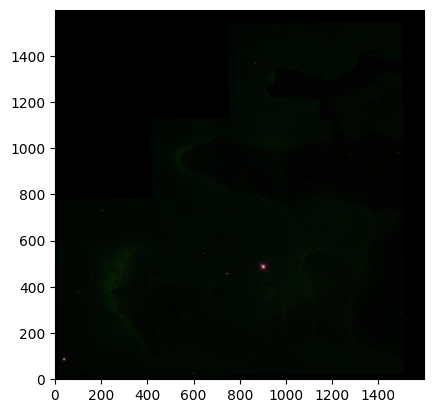

In [98]:
rgb_tuned = np.dstack([
    norm_sii * 1.2,  # Red boost
    norm_ha * 1.0,
    norm_oiii * 1.5  # Blue boost
])
rgb_tuned = np.clip(rgb_tuned, 0, 1)
plt.imshow(rgb_tuned, origin='lower')


In [99]:
from scipy.ndimage import gaussian_filter
rgb_denoised = gaussian_filter(rgb_tuned, sigma=(0, 0, 1))

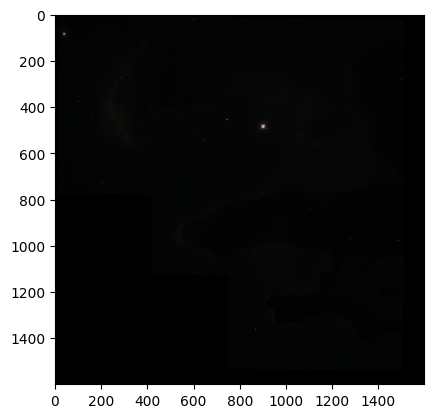

In [100]:
plt.imshow(rgb_denoised,cmap='inferno')